In [ ]:
import warnings #to ignore any warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt






In [ ]:
import pandas as pd
df = pd.read_excel('/content/fertilizer.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146550 entries, 0 to 146549
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area_code     146550 non-null  int64  
 1   Area          146550 non-null  object 
 2   Item_code     146550 non-null  int64  
 3   Item          146550 non-null  object 
 4   Element_code  146550 non-null  int64  
 5   Element       146550 non-null  object 
 6   Year_code     146550 non-null  int64  
 7   Year          146550 non-null  int64  
 8   Unit          146550 non-null  object 
 9   Value         146550 non-null  float64
 10  Flag          146550 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 12.3+ MB


In [ ]:
df.isnull().sum()

Area_code       0
Area            0
Item_code       0
Item            0
Element_code    0
Element         0
Year_code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

In [ ]:
X

,Area_code,Item_code,Element_code,Year_code,Year
0,1,4007,5610,2006,2006
1,1,4007,5610,2007,2007
2,1,4007,5610,2008,2008
3,1,4007,5610,2009,2009
4,1,4007,5610,2010,2010
...,...,...,...,...,...
146545,276,4006,5622,2013,2013
146546,276,4006,5622,2014,2014
146547,276,4006,5622,2015,2015
146548,276,4006,5622,2016,2016


In [ ]:
#X = df.drop(['Area_code','Item_code','Element_code','Element'],axis=1)
#Y = df['Value']

In [ ]:
X = df.drop(['Area','Item','Flag','Element','Unit','Value'],axis=1)
Y = df['Value']

In [ ]:
X.shape, Y.shape

((146550, 5), (146550,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=7)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((102585, 5), (43965, 5), (102585,), (43965,))

In [ ]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(oob_score=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param grid is dictionary 
# key --> name of parameter to be tuned
# value --> list of values which you want to check 
param_grid = {
'n_estimators' : [ 50, 200, 100],
'criterion' : ['squared_error','poisson'],
'max_depth' :[ 3, 5,7],
'max_features' : ['sqrt', 'log2'],
'max_samples' : [0.7, 0.8, 0.9]
}

In [ ]:
gscv =GridSearchCV(estimator = rf, param_grid = param_grid, cv=2, verbose=2)

In [ ]:
gscv.fit(X_train,Y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=200; total time=   4.7s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=200; total time=   3.9s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=100; total time=   1.4s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=100; total time=   1.4s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=50; 

GridSearchCV(cv=2, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.7, 0.8, 0.9],
                         'n_estimators': [50, 200, 100]},
             verbose=2)

In [ ]:
rf = RandomForestRegressor(n_estimators=50,max_depth=5, oob_score=True,random_state=7)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True,
                      random_state=7)

In [ ]:
Y_pred_rf = rf.predict(X_test)
Y_pred_rf

array([58082.68910606, 34180.2055271 , 54992.07314899, ...,
       46493.30369221, 83293.50511107, 50221.26494578])

Apply XGBoost (from SKlearn) Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
'n_estimators' : [ 50, 200],
'criterion' : ['squared_error','poisson'],
'subsample' : [0.7, 0.8],
'max_depth' :[ 5,7]
}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gscv =GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid, cv=2, verbose=2)

In [ ]:
gscv.fit(X_train,Y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END criterion=squared_error, max_depth=5, n_estimators=50, subsample=0.7; total time=   2.1s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50, subsample=0.7; total time=   2.1s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200, subsample=0.7; total time=   8.3s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200, subsample=0.7; total time=   8.3s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200, subsample=0.8; total time=   9.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200, subsample=0.8; total time=   9.0s
[CV] END criterion=squared_error, max_depth=7, n_estimators=50, subsample=0.7; total time=   2.7s
[CV] END criterion=squared_error, max_depth=7, n_esti

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [5, 7], 'n_estimators': [50, 200],
                         'subsample': [0.7, 0.8]},
             verbose=2)

In [ ]:
gbr = GradientBoostingRegressor(max_depth= 5, n_estimators= 50, subsample= 0.8,random_state=7)
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=7,
                          subsample=0.8)

In [ ]:
Y_pred_gbr = gbr.predict(X_test)

Compare the models
Compare the mse, mae, r2 score
compare the plots

In [ ]:
# 1 compare mse, mae and r2 score
r2, mse, mae = eval_fun(Y_test,Y_pred_rf) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.32098203264575276 mse =  359822874908.0592  mae = 134645.50743247944


In [ ]:
r2, mse, mae = eval_fun(Y_test,Y_pred_gbr) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.535600119933803 mse =  246093193385.55746  mae = 116692.48623546824


Plot the results of regression and compare

In [ ]:
res = pd.DataFrame([Y_test.values, Y_pred_rf, Y_pred_gbr]).T
res.columns = ['Y_test', 'Y_pred_rf', 'Y_pred_gbr',]
res.shape

(43965, 3)

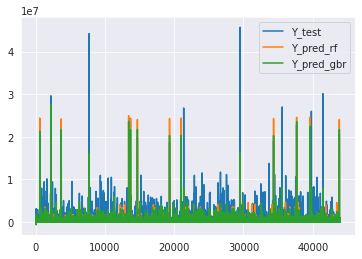

In [ ]:
res.plot()

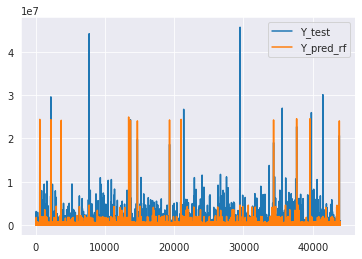

In [ ]:
res[['Y_test', 'Y_pred_rf']].plot()

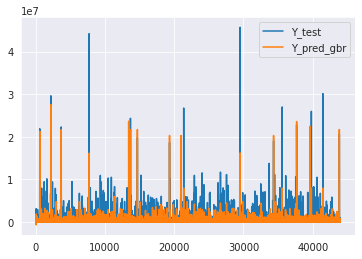

In [ ]:
res[['Y_test', 'Y_pred_gbr']].plot()

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred= regressor.predict(X_test)  

In [ ]:
print('Train Score: ', regressor.score(X_train, Y_train))  
print('Test Score: ', regressor.score(X_test, Y_test))  

Train Score:  0.008120415465623032
Test Score:  0.007791157778441193


In [ ]:
y=rf.predict(X_test)

In [ ]:
#Linear REgression(lr_model)
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train,Y_train)
y_pred_lr = lr_model.predict(X_test)
#r2,mse,mae for lr model
r2,mse,mae = eval_fun(Y_test,y_pred_lr)
print("r2 score: ",r2,"mean_squared_error: ",mse,"mean_absolute_error: ",mae)

r2 score:  0.007791157778441193 mean_squared_error:  525787910308.85834 mean_absolute_error:  160883.0405366872


In [ ]:
##Decsion Tree(tree)
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)
y_pred_tree = tree.predict(X_test)

#r2,mse,mae for dt model
r2,mse,mae = eval_fun(Y_test,y_pred_tree)
print("r2 score: ",r2,"mean_squared_error: ",mse,"mean_absolute_error: ",mae)

r2 score:  0.8385377811278403 mean_squared_error:  85561505846.435 mean_absolute_error:  28676.72092914818


In [ ]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([5.4971847e+05, 8.2908710e+04, 1.3740000e+02, ..., 1.2902100e+03,
       3.8910000e+01, 3.0301000e+02])

In [ ]:
X_test

,Area_code,Item_code,Element_code,Year_code,Year
145666,272,4012,5610,2017,2017
81706,138,4024,5622,2016,2016
94045,166,4007,5610,2015,2015
123093,217,4003,5157,2006,2006
141486,249,4003,5622,2011,2011
...,...,...,...,...,...
50049,97,4022,5622,2004,2004
104050,183,4012,5610,2002,2002
142746,255,4018,5922,2011,2011
65811,110,4023,5910,2017,2017
